# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Egbert Tjandra
- **Email:** m232b4ky1234@bangkit.academy
- **ID Dicoding:** 6162101021@student.unpar.ac.id

## Menentukan Pertanyaan Bisnis

- Bagaimana perubahan rata-rata penyewaan sepeda di setiap musim selama tahun 2011 dan 2012, dengan mempertimbangkan perbedaan antara hari kerja dan akhir pekan?
- Seberapa besar pengaruh cuaca terhadap jumlah penyewaan sepeda selama bulan Agustus hingga Desember 2011 ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [2]:
bike_day = pd.read_csv('/content/day.csv')
print(bike_day.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [3]:
bike_hour = pd.read_csv('/content/hour.csv')
print(bike_hour.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


**Insight:**
- Data yang akan saya gunakan untuk menganalisis lebih lanjut adalah data 'bike_hour'. Dataset ini memberikan analisis yang lebih mendalam dan spesifik dengan detail waktu per jam.

### Assessing Data

In [4]:
bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
bike_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [6]:
print("Jumlah duplikasi: ", bike_hour.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
bike_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dari hasil *output* 'bike_hour.info()' dapat dilihat bahwa dataset memiliki 17,379 entri yang *non-null*, yang menunjukan bahwa tidak ada nilai yang hilang dalam dataset, hal ini juga didukung dari hasil output 'bike_hour.isna().sum()' yang menunjukan tidak adanya nilai yang hilang dalam datasetnya.
- Dari hasil *output* 'bike_hour.info()' dapat dilihat bahwa variabel dteday masih berupa object, sehingga nanti pada waktu cleaning akan lebih baik jika dirubah dtypenya menjadi tipe datetime.
- Jumlah duplikasinya juga 0 yang berarti tidak ada duplikasi dalam dataset, sehingga tidak perlu khawatir tentang adanya entri yang berulang.
- Dari hasil *output* 'bike_hour.describe()' dapat dilihat bahwa rata-rata penyewaan sepeda adalah sebanyak 189 dengan standar deviasi sebesar 181, hal ini menunjukan adanya fluktuasi jumlah penyewaan yang mungkin dapat dipengaruhi oleh faktor seperti cuaca, hari kerja, suhu, maupun musim.

### Cleaning Data

In [8]:
#Mengonversi kolom dteday menjadi tipe datetime
bike_hour['dteday'] = pd.to_datetime(bike_hour['dteday'])

In [9]:
#Melakukan pengecekan tipe data untuk memastikan kebeharsilan konversi
print(bike_hour.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


**Insight:**
- Dapat dilihat bahwa variabel dteday sudah berhasi diubah menjadi dtype datetime, hal ini nantinya dapat membantu dan memudahkan kita untuk menganalisis data berdasarkan tahun, bulan, dan jam.

## Exploratory Data Analysis (EDA)

### Explore Data Analysis untuk Pertanyaan 1

---



In [33]:
#Anlisis Rata-rata Penyewaan per Musim
season_rental = bike_hour.groupby('season')['cnt'].agg('mean').reset_index()
season_rental.columns = ['Season', 'Average Rentals']
print(season_rental)

   Season  Average Rentals
0       1       111.114569
1       2       208.344069
2       3       236.016237
3       4       198.868856


In [34]:
#Anlisis Penyewaan Berdasarkan Musim dan Tahun
season_year_rental = bike_hour.groupby(['season', 'yr'])['cnt'].mean().unstack()
print(season_year_rental)

yr               0           1
season                        
1        72.533849  147.814167
2       157.655924  258.963282
3       187.343750  284.343528
4       152.828960  245.698761


In [41]:
#Membuat kolom baru untuk membedakan weekend dan weekday
bike_hour['weekday'] = bike_hour['dteday'].dt.dayofweek
bike_hour['weekend'] = bike_hour['weekday'].apply(lambda x: 1 if x >= 5 else 0)  # 1: weekend, 0: weekday
avg_rentals = bike_hour.groupby(['season', 'yr', 'weekend'])['cnt'].mean().reset_index()
print(avg_rentals)

    season  yr  weekend         cnt
0        1   0        0   76.341020
1        1   0        1   63.981162
2        1   1        0  154.705959
3        1   1        1  131.548686
4        2   0        0  154.613924
5        2   0        1  165.370787
6        2   1        0  256.611884
7        2   1        1  264.924679
8        3   0        0  186.066912
9        3   0        1  190.747954
10       3   1        0  291.542910
11       3   1        1  266.478395
12       4   0        0  152.085430
13       4   0        1  154.628205
14       4   1        0  249.373832
15       4   1        1  236.523333


In [47]:
#Analisis data berdasarkan musim, weekend, dan menghitung rata-rata penyewaan kasual dan terdaftar
user_stats = bike_hour.groupby(['season', 'weekend'])[['casual', 'registered']].mean().reset_index()
user_stats.columns = ['Season', 'Weekend', 'Average Casual Rentals', 'Average Registered Rentals']
print(user_stats)

   Season  Weekend  Average Casual Rentals  Average Registered Rentals
0       1        0               10.266058                  106.529074
1       1        1               23.563084                   74.464953
2       2        0               32.819418                  172.825743
3       2        1               79.989575                  135.198075
4       3        0               39.411183                  199.051591
5       3        1               78.250199                  151.475774
6       4        0               21.252660                  179.282912
7       4        1               53.802288                  140.970588


**Insight:**
- Berdasarkan analisis-analisis yang dilakukan, pada tahun 2011 dan 2012, rata-rata penyewaan sepeda mengalami peningkatan yang signifikan di setiap musimnya, dengan musim 1 (spring) yang mungkin mencatat penyewaan terendah namun mengalami peningkatan sebesar 103% , rata-rata penyewaan sepeda di tahun 2011 berada di angka 72.53 dan berubah menjadi 147.81 di tahun 2012. Musim 2 (summer) dan musim 3 (fall) mungkin tidak memberikan presentase kenaikan sebesar musim 1 namun kenaikannya lebih tinggi, pada musim 2 (summer) di tahun 2011, rata-rata penyewaan sepeda berada di angka 157.66 dan pada tahun 2012 menjadi 258.96, sedangkan musim 3  (fall), pada tahun 2011, rata-rata penyewaan sepeda berada di angka 152.83 dan berubah menjadi 245.70 di tahun 2012. Sementara musim 4 (winter), musim yang diekspektasikan menjadi musim dengan rata-rata penyewaan sepeda terendah justru juga mengalami peningkatan yang bagus, pada tahun 2011 rata-rata penyewaan sepeda berada di angka 152.83 dan berubah menjadi 245.70 pada tahun 2012. Selain itu, analisis yang lebih mendalam juga dilakukan, hasil yang didapatkan  adalah analisis menunjukan bahwa penyewaan sepeda tidak selalu lebih tinggi pada weekend, terdapat variasi dimana penyewaan sepeda pada weekday lebih tinggi. Analisis yang lain juga dilakukan dengan melihat penyewa sepeda kasual dan penyewa sepeda terdaftar, berdasarkan analisis, penyewaan sepeda kasual cenderung lebih tinggi pada akhir pekan, sedangkan penyewaan terdaftar menunjukan pola yang lebih konsisten dengan angka yang lebih tinggi pada hari kerja. Hal ini menandakan bahwa pengguna terdaftar mungkin menggunakan sepeda sebagai alat transportasi harian, sementara pengguna kasual menggunakan sepeda untuk rekreasi pada akhir pekan. Maka dari itu, dengan kita memaksimalkan pengalamn pengguna pada hari kerja dan akhir pekan, terutama pada musim-musim yang lebih hangat, dapat membantu meningkatkan tingkat penyewaan secara keseluruhan.

### Explore Data Analysis untuk Pertanyaan 2

---


In [92]:
# Menampilkan ringkasan statistik dari fitur cuaca untuk bulan Agustus hingga Desember 2011
bike_hour_aug_dec = bike_hour[(bike_hour['yr'] == 0) & (bike_hour['dteday'].dt.month >= 8)]
avg_rentals_by_weathersit = bike_hour_aug_dec.groupby('weathersit')['cnt'].mean().reset_index()
avg_rentals_by_weathersit.columns = ['Weather Condition', 'Average Rentals']
print(avg_rentals_by_weathersit)

   Weather Condition  Average Rentals
0                  1       166.341443
1                  2       163.790270
2                  3        93.644909


In [96]:
#Proses binning
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = ['Very Cold', 'Cold', 'Mild', 'Warm', 'Hot']
bike_hour_aug_dec.loc[:, 'temp_bins'] = pd.cut(bike_hour_aug_dec['temp'], bins=bins, labels=labels,right=False)

#Analisis rata-rata penyewaan berdasarkan bin suhu
avg_rentals_by_temp_bins = bike_hour_aug_dec.groupby('temp_bins', observed=True)['cnt'].mean().reset_index()
print(avg_rentals_by_temp_bins)

   temp_bins         cnt
0  Very Cold   70.769231
1       Cold  105.667965
2       Mild  157.825519
3       Warm  195.106454
4        Hot  275.538462


In [97]:
#Membuat salinan DataFrame untuk menghindari SettingWithCopyWarning
bike_hour_aug_dec_copy = bike_hour_aug_dec.copy()

#Proses binning
humidity_bins = [ 0.2, 0.4, 0.6, 0.8, 1.0]
humidity_labels = ['Low', 'Moderate', 'High', 'Very High']
bike_hour_aug_dec_copy['humidity_bins'] = pd.cut(bike_hour_aug_dec_copy['hum'], bins=humidity_bins, labels=humidity_labels)

#Analisis rata-rata penyewaan berdasarkan kelompok kelembaban
avg_rentals_by_humidity_bins = bike_hour_aug_dec_copy.groupby('humidity_bins', observed=False)['cnt'].mean().reset_index()
avg_rentals_by_humidity_bins.columns = ['Humidity Level', 'Average Rentals']
print(avg_rentals_by_humidity_bins)

  Humidity Level  Average Rentals
0            Low       264.021645
1       Moderate       211.439024
2           High       152.722788
3      Very High        97.530630


In [101]:
#Proses binning
windspeed_bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
windspeed_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
bike_hour_aug_dec.loc[:, 'windspeed_bins'] = pd.cut(bike_hour_aug_dec['windspeed'], bins=windspeed_bins, labels=windspeed_labels, right=False)

#Analisis rata-rata penyewaan berdasarkan kelompok kecepatan angin
avg_rentals_by_windspeed_bins = bike_hour_aug_dec.groupby('windspeed_bins',observed=False)['cnt'].mean().reset_index()
avg_rentals_by_windspeed_bins.columns = ['Windspeed Level', 'Average Rentals']
print(avg_rentals_by_windspeed_bins)

  Windspeed Level  Average Rentals
0        Very Low       148.490238
1             Low       175.478147
2        Moderate       178.379310
3            High       127.800000
4       Very High        16.000000


**Insight:**
- Penyewaan sepeda dari bulan Agustus hingga Desember pada Tahun 2011 sangat dipengaruhi oleh faktor cuaca. Rata-rata penyewaan sepeda mencapai 70.77 pada kategori "Very Cold," meningkat menjadi 105.67 pada "Cold," 157.83 pada "Mild," 195.11 pada "Warm," dan puncaknya di 275.54 pada "Hot." Di sisi lain, kelembaban memberikan dampak signifikan, dengan rata-rata penyewaan tertinggi pada tingkat "Low" (264.02), diikuti oleh "Moderate" (211.44), "High" (152.72), dan "Very High" (97.53), yang menunjukkan bahwa kelembaban yang lebih tinggi mengurangi minat penyewaan sepeda. Selain itu, kecepatan angin yang "Very Low" dan "Low" menunjukkan rata-rata penyewaan sepeda masing-masing di angka 148.49 dan 175.48, namun angka tersebut menurun menjadi 127.80 pada kategori "High" dan hanya 16.00 pada "Very High." Situasi cuaca juga berpengaruh, di mana rata-rata penyewaan sepeda adalah 166.34 pada kondisi "Clear," sedikit lebih rendah pada "Mist and Cloudy" (163.79), menurun drastis menjadi 93.64 pada kondisi "Light Snow and Rain.", dan bahkan tidak ada penyewa sama sekali disaat kondisnya 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'. Secara keseluruhan, penyewaan sepeda meningkat pada suhu hangat dan kondisi cerah, sementara kelembaban, kecepatan angin yang tinggi, serta cuaca ekstrim cenderung mengurangi minat penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perubahan rata-rata penyewaan sepeda di setiap musim selama tahun 2011 dan 2012, dengan mempertimbangkan perbedaan antara hari kerja dan akhir pekan?

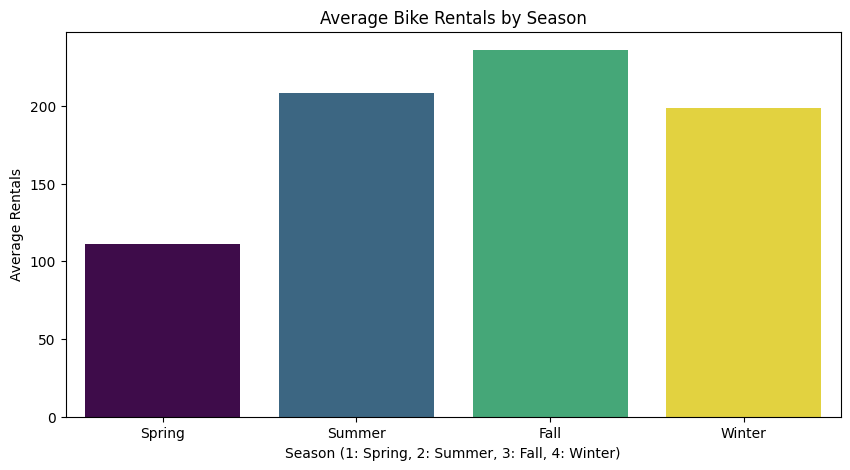

In [48]:
plt.figure(figsize=(10, 5))
sn.barplot(data=season_rental, x='Season', y='Average Rentals', palette='viridis',hue ='Season', legend = False)
plt.title('Average Bike Rentals by Season')
plt.xlabel('Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Average Rentals')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

<Figure size 1000x500 with 0 Axes>

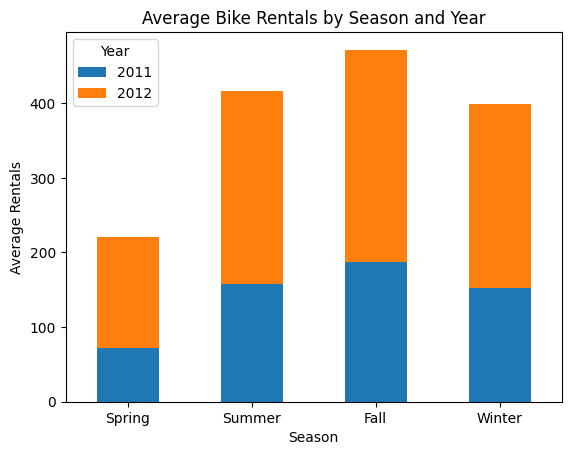

In [49]:
plt.figure(figsize=(10, 5))
season_year_rental.plot(kind='bar', stacked=True)
plt.title('Average Bike Rentals by Season and Year')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'], rotation=0)
plt.legend(title='Year', labels=['2011', '2012'])
plt.show()

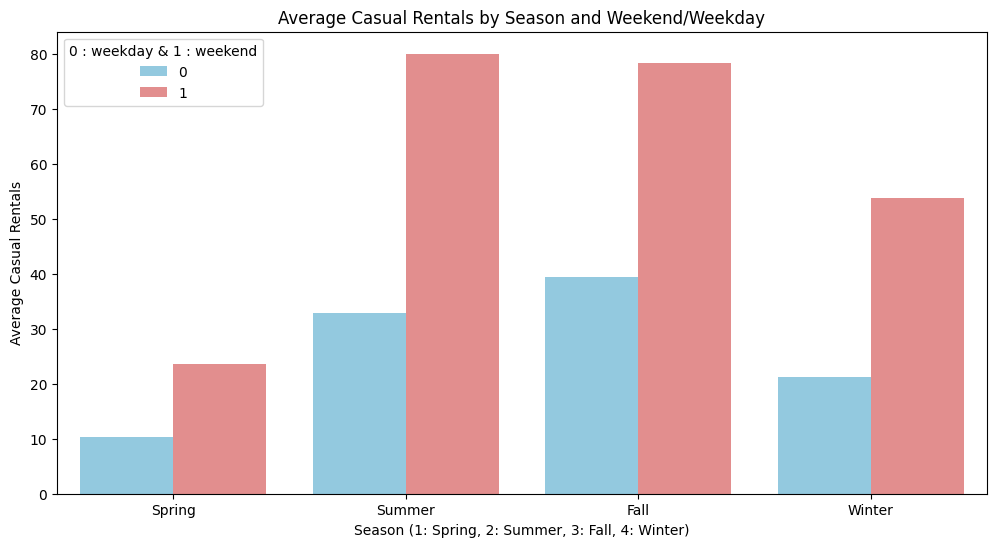

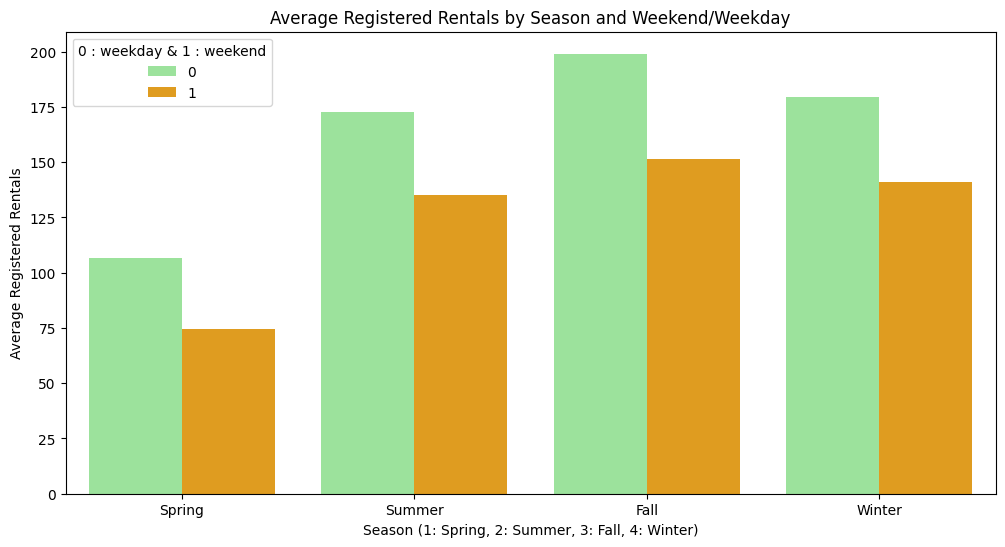

In [73]:
plt.figure(figsize=(12, 6))
sn.barplot(data=user_stats, x='Season', y='Average Casual Rentals', hue='Weekend', palette={0: 'skyblue', 1: 'lightcoral'})
plt.title('Average Casual Rentals by Season and Weekend/Weekday')
plt.xlabel('Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Average Casual Rentals')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.legend(title='0 : weekday & 1 : weekend', loc ='upper left')
plt.show()

plt.figure(figsize=(12, 6))
sn.barplot(data=user_stats, x='Season', y='Average Registered Rentals', hue='Weekend',  palette={0: 'lightgreen', 1: 'orange'})
plt.title('Average Registered Rentals by Season and Weekend/Weekday')
plt.xlabel('Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Average Registered Rentals')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.legend(title='0 : weekday & 1 : weekend', loc ='upper left')
plt.show()

**Insight:**
- Visualisasi 1 : Grafik ini menunjukkan bahwa rata-rata penyewaan sepeda tertinggi terjadi pada musim 2 (Summer), sementara musim 1 (Spring) mencatat rata-rata terendah. Ini menunjukkan tren penyewaan yang lebih tinggi selama musim yang lebih hangat.
- Visualisasi 2: Grafik ini menunjukan rata-rata Penyewaan Sepeda per Musim dan Tahun
Grafik ini menggambarkan peningkatan rata-rata penyewaan sepeda dari tahun 2011 ke 2012 di setiap musim. Musim 2 (Summer) menunjukkan pertumbuhan paling signifikan, mencerminkan minat yang meningkat terhadap penyewaan sepeda.
- Visualisasi 3 : Grafik ini memperlihatkan bahwa penyewaan kasual lebih tinggi pada akhir pekan dibandingkan hari kerja, sementara penyewaan terdaftar lebih tinggi pada hari kerja dibandingkan akhir pekan. Ini menunjukkan bahwa pengguna kasual lebih aktif menyewa sepeda pada akhir pekan.

### Pertanyaan 2:   

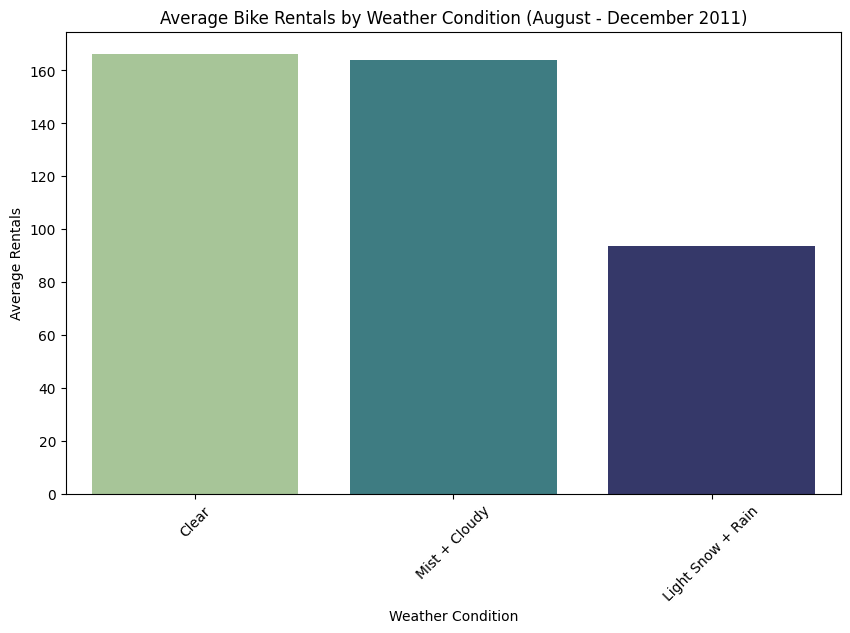

In [108]:
plt.figure(figsize=(10, 6))
sn.barplot(data=avg_rentals_by_weathersit, x='Weather Condition', y='Average Rentals', palette='crest', hue = 'Weather Condition',legend=False)
plt.title('Average Bike Rentals by Weather Condition (August - December 2011)')
plt.xlabel('Weather Condition')
plt.ylabel('Average Rentals')
plt.xticks(ticks=[0, 1, 2], labels=['Clear', 'Mist + Cloudy', 'Light Snow + Rain'], rotation=45)
plt.show()

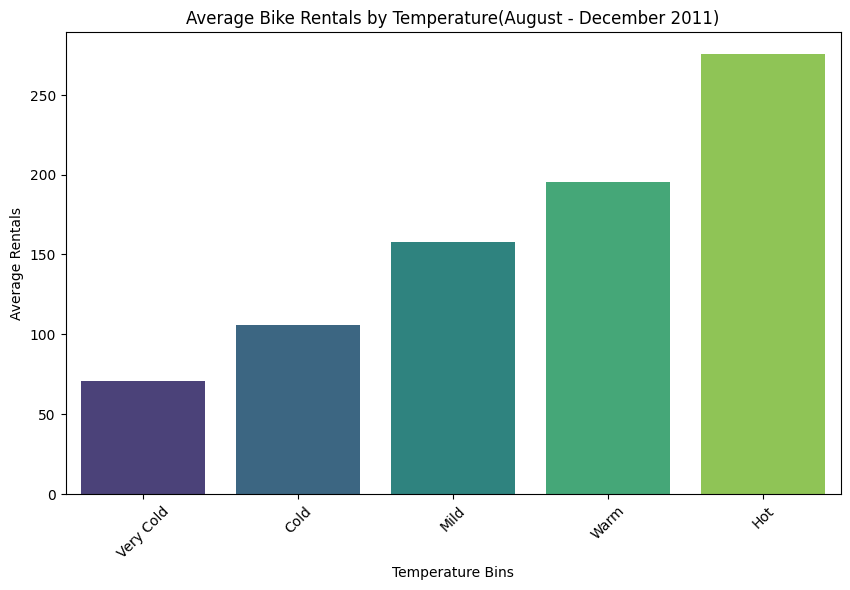

In [111]:
plt.figure(figsize=(10, 6))
sn.barplot(data=avg_rentals_by_temp_bins, x='temp_bins', y='cnt', palette='viridis', hue ='temp_bins',legend = False)
plt.title('Average Bike Rentals by Temperature(August - December 2011)')
plt.xlabel('Temperature Bins')
plt.ylabel('Average Rentals')
plt.xticks(rotation=45)
plt.show()

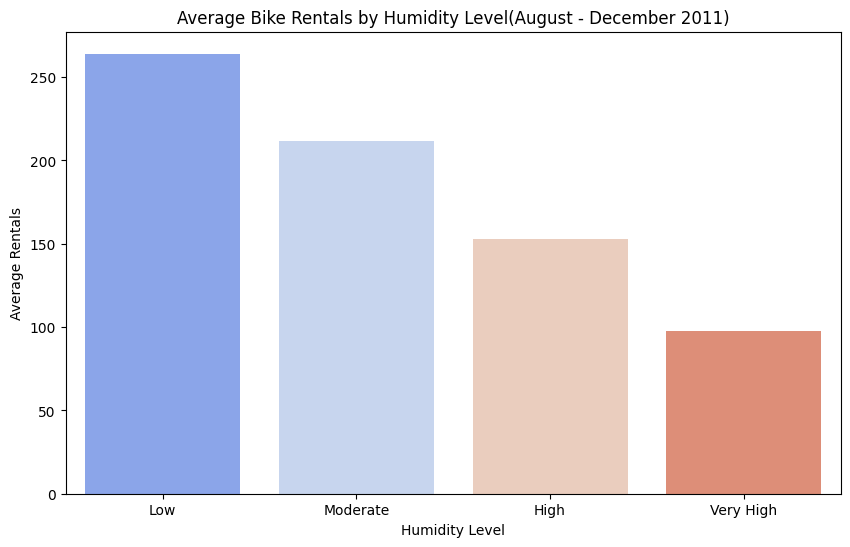

In [110]:
plt.figure(figsize=(10, 6))
sn.barplot(data=avg_rentals_by_humidity_bins, x='Humidity Level', y='Average Rentals', palette='coolwarm', hue='Humidity Level',legend=False)
plt.title('Average Bike Rentals by Humidity Level(August - December 2011)')
plt.xlabel('Humidity Level')
plt.ylabel('Average Rentals')
plt.show()

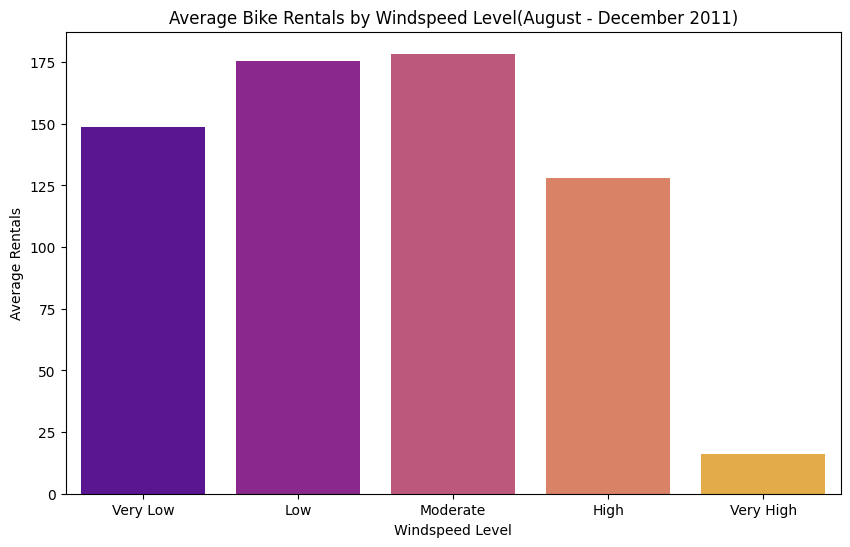

In [109]:
plt.figure(figsize=(10, 6))
sn.barplot(data=avg_rentals_by_windspeed_bins, x='Windspeed Level', y='Average Rentals', palette='plasma', hue='Windspeed Level', legend = False)
plt.title('Average Bike Rentals by Windspeed Level(August - December 2011)')
plt.xlabel('Windspeed Level')
plt.ylabel('Average Rentals')
plt.show()

**Insight:**
- Visualisasi 1 : Grafik ini menunjukkan rata-rata penyewaan sepeda berdasarkan kondisi cuaca selama periode Agustus hingga Desember 2011. Dari hasil visualisasi, kondisi cuaca "Clear" (Cerah) memiliki rata-rata penyewaan tertinggi, yaitu sekitar 166 penyewaan, sedangkan kondisi cuaca "Light Snow + Rain" (Salju Ringan + Hujan) memiliki rata-rata penyewaan terendah dengan sekitar 93 penyewaan. Hal ini menunjukkan bahwa kondisi cuaca yang lebih baik, seperti cuaca cerah, lebih mendorong orang untuk menyewa sepeda.
- Visualisasi 2 : Grafik ini menunjukkan hubungan antara suhu dan rata-rata penyewaan sepeda selama periode Agustus hingga Desember 2011. Dari grafik, terlihat bahwa seiring meningkatnya suhu, rata-rata penyewaan sepeda juga meningkat. Kategori "Very Cold" (Sangat Dingin) memiliki rata-rata penyewaan terendah, yaitu sekitar 70 penyewaan, sementara kategori "Hot" (Panas) mencatat rata-rata tertinggi dengan sekitar 275 penyewaan. Hal ini menunjukkan bahwa cuaca yang lebih hangat lebih menarik bagi pengguna sepeda.   
- Visualisasi 3 :Grafik ini memperlihatkan rata-rata penyewaan sepeda berdasarkan level kelembaban selama periode Agustus hingga Desember 2011. Kelembaban rendah (Low) menunjukkan rata-rata penyewaan tertinggi dengan sekitar 264 penyewaan, sedangkan kelembaban sangat tinggi (Very High) memiliki rata-rata terendah, yaitu sekitar 97 penyewaan. Ini menunjukkan bahwa pengguna cenderung lebih memilih untuk menyewa sepeda saat kelembaban rendah, yang lebih nyaman bagi aktivitas luar ruangan.
- Visualisasi 4 : Grafik ini menampilkan rata-rata penyewaan sepeda berdasarkan level kecepatan angin selama periode Agustus hingga Desember 2011. Dari grafik, terlihat bahwa pada level kecepatan angin "Very Low" (Sangat Rendah) dan "Low" (Rendah), rata-rata penyewaan cukup tinggi, masing-masing sekitar 148 dan 175 penyewaan. Namun, ketika kecepatan angin meningkat ke level "Very High" (Sangat Tinggi), rata-rata penyewaan turun drastis menjadi hanya 16 penyewaan. Ini menunjukkan bahwa kecepatan angin yang tinggi dapat menjadi penghalang bagi orang-orang untuk menyewa sepeda.

# Pembuatan File Requirements.txt

In [30]:
!pip freeze > requirements.txt

In [31]:
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Analisis Lanjutan (Opsional)

Analisis lanjutan seperti RFM Analysis dan Geospatial Analysis tidak dapat dilakukan di bike sharing dataset. Alasan yang utama adalah tidak adanya informasi seperti customer ID yang perlu digunakan untuk melakukan RFM Analysis, alasan utama yang lainnya tidak adanya pula informasi seperti lokasi geografis yang perlu digunakan untuk melakukan Geospatial Analysis. Maka dari itu hal yang akan dilakukan adalah Clustering. Untuk clustering sendiri sebenarnya sudah dilakukan dibagian EDA, seperti proses binning, namun dibawah ini saya akan coba memberi contoh lain untuk manual clustering.

    mnth     cnt
0      1  134933
1      2  151352
2      3  228920
3      4  269094
4      5  331686
5      6  346342
6      7  344948
7      8  351194
8      9  345991
9     10  322352
10    11  254831
11    12  211036


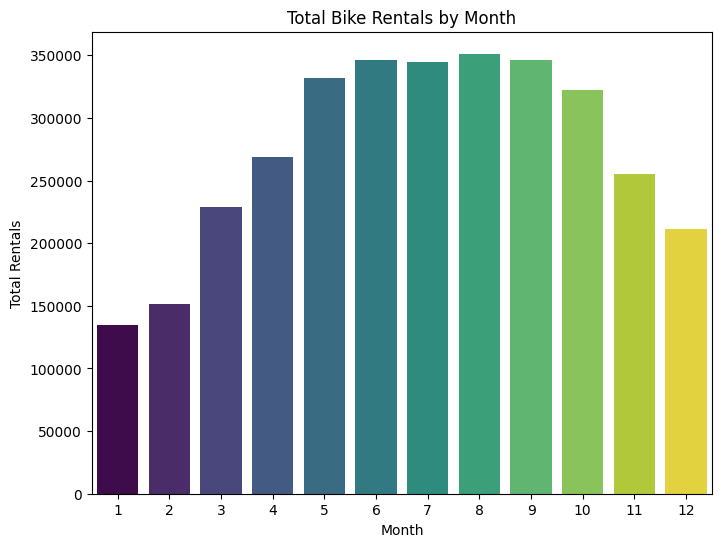

In [ ]:
#Menganalisis total penyewaan sepeda berdasarkan bulan
monthly_counts = bike_hour.groupby('mnth')['cnt'].sum().reset_index()
print(monthly_counts)

#Visualisasi
plt.figure(figsize=(8, 6))
sn.barplot(x='mnth', y='cnt', data=monthly_counts, palette='viridis', hue='mnth',legend=False)
plt.title('Total Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.show()

**Insight:**
- Sangat disayangkan informasi yang minim ini juga meminimkan analisis yang lebih mendalam, misal adanya informasi customer_id kita bisa melakukan analysis RFM yang memungkinkan memberikan insight-insight yang cemerlang yang mungkin bisa membuat customer lebih loyal dan setia. Contoh lain, dengan adanya informasi lokasi geografis atau mungkin toko 1, toko 2, dan etc akan memungkinkan analisis lebih insightful lagi seperti memfokuskan penyewaan di toko 1, menambahkan kuota sepeda di toko yang penjualannya besar, dan tentu masih banyak insight-insight yang lain.

## Conclusion

- Perubahan rata-rata penyewaan sepeda di setiap musim selama tahun 2011 dan 2012 menunjukkan tren positif yang signifikan, dengan musim semi (spring) mengalami peningkatan tertinggi sebesar 103%, dari 72.53 pada tahun 2011 menjadi 147.81 pada tahun 2012. Musim panas (summer) dan musim gugur (fall) juga mencatat kenaikan yang lumayan signifikan, dengan rata-rata penyewaan musim panas meningkat dari 157.66 menjadi 258.96, dan musim gugur dari 152.83 menjadi 245.70. Menariknya, musim dingin (winter), yang biasanya diperkirakan sebagai musim dengan penyewaan terendah, justru menunjukkan peningkatan dari 152.83 menjadi 245.70. Selain itu, analisis menunjukkan bahwa penyewaan sepeda tidak selalu lebih tinggi pada akhir pekan, penyewa terdaftar cenderung menyewa lebih banyak pada hari kerja, menunjukkan penggunaan sepeda sebagai alat transportasi harian, sementara penyewa kasual lebih aktif di akhir pekan. Dengan memahami pola ini, upaya dapat dilakukan untuk memaksimalkan pengalaman pengguna pada kedua periode tersebut untuk meningkatkan tingkat penyewaan secara keseluruhan.
- SANGAT BERPENGARUH, pengaruh cuaca terhadap jumlah penyewaan sepeda selama bulan Agustus hingga Desember 2011 sangat signifikan, di mana rata-rata penyewaan meningkat seiring dengan suhu yang lebih hangat. Penyewaan tertinggi tercatat pada kategori "Hot" dengan rata-rata 275.54, sementara pada kategori "Very Cold" hanya mencapai 70.77. Kelembaban juga memainkan peranan penting, dengan tingkat "Low" menghasilkan rata-rata penyewaan 264.02, namun angka tersebut menurun drastis pada tingkat kelembaban yang lebih tinggi. Selain itu, kecepatan angin yang rendah berkontribusi pada tingkat penyewaan yang lebih baik, sementara kecepatan angin yang tinggi dan kondisi cuaca ekstrem, seperti hujan lebat dan salju, menyebabkan penurunan tajam dalam jumlah penyewa, bahkan tidak ada penyewa pada kondisi cuaca yang sangat buruk. Dengan demikian, kondisi cuaca yang baik, seperti suhu hangat dan cuaca cerah, mendorong peningkatan penyewaan sepeda, sementara kelembaban tinggi dan kondisi cuaca buruk cenderung mengurangi minat penyewaan.